<a href="https://colab.research.google.com/github/rajat031/machinelearninglab-cs3-acro/blob/master/Perceptron_model_for_AND_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr, epochs):
        self.W = np.zeros((input_size+1,1))
        # add one for bias
        self.epochs = epochs
        self.lr = lr
        self.loss_list=[]
    
    def activation_fn(self, z):
        #return (x >= 0).astype(np.float32)
        return 1 if z >= 0 else 0
 
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for i in range(self.epochs):
          l=0
          for j in range(d.shape[0]):
            x = np.insert(X[j], 0, 1)
            x=x.reshape((3,1))
            y = self.predict(x)
            e = d[j] - y
            l+=e**2
            self.W = self.W + self.lr * e * x
          l=l/4
          self.loss_list.append(l)

In [2]:
if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    d = np.array([0, 0, 0, 1])
 
    perceptron = Perceptron(input_size=2,lr=0.001,epochs=100)
    perceptron.fit(X, d)
    print(perceptron.W)

[[-0.003]
 [ 0.002]
 [ 0.001]]


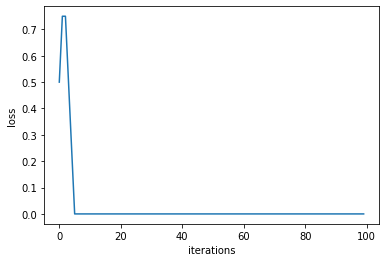

In [3]:
import matplotlib.pyplot as plt
x_axis=[int(x) for x in range(100)]
y_axis=perceptron.loss_list

plt.plot(x_axis,y_axis)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()